# Image Data Augmentation with Keras

![Horizontal Flip](horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 35
)

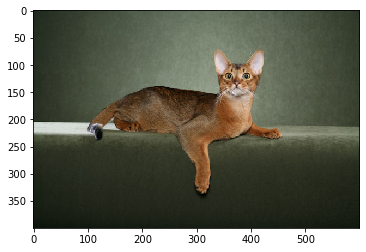

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


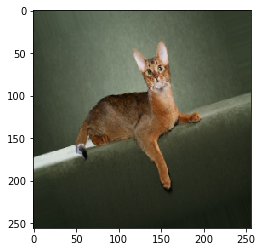

In [8]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    height_shift_range = [-50,45],  # we can give range using list or tuple
    width_shift_range = [-100,50,0,50,100]  # we can give range using list or tuple
)

Found 1 images belonging to 1 classes.


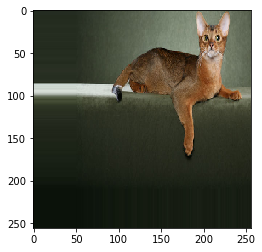

In [14]:
# creating iterator and getting the next item from the generator
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


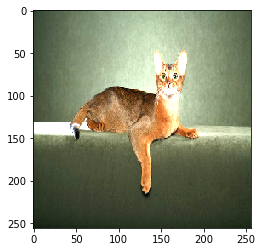

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.5,2.)  # brightness of the image can be range from 0.5 to 2.0
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


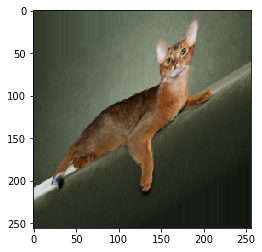

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 38  # shear transformation means bottom co-ordinats will remain intact and top pixels will shift by given range
                        # we need to very careful as it might give completely different image
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


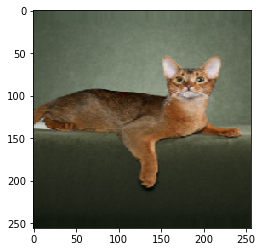

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range = [0.5,1.3] # default value is 1 and we will get zoom in and zoom out images
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


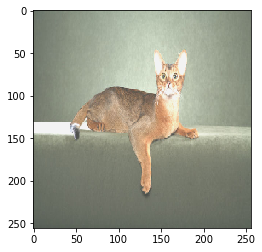

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range= 76  # this change will apply across rgb channels ranging from -76 to 76
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [33]:
x.mean()

144.83347

In [34]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


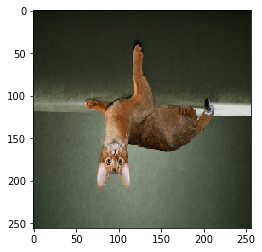

In [42]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip =True,   # flipping images vertically or horizontally
    vertical_flip =True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [43]:
# we can do future wise and sample wise normalization

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# we can calcaulate normalization data as below
#x_mean = x_train.mean()
#x_std = x_train.std()
#x_train_norm = (x_train-x_mean)/x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center = True,       # calculates mean
    featurewise_std_normalization = True   # calculates std
)

generator.fit(x_train)  # to compute the mean and std we need to fit it using train data

In [44]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.37321123 0.98725843 [[9]]
120.70756512369792


### Samplewise

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization= True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)   # x mean will close to 0 and std is close to 1 almsot every time

-5.9604645e-08 1.0 [[7]]


# Task 10: Rescale and Preprocessing Function

In [50]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1., # rescale means multiply input pixel values with rescale value
    preprocessing_function =tf.keras.applications.mobilenet_v2.preprocess_input  # it takes 3d tensot or numpy array and returns same and it will do some data normalization , we are not rescaling as we are applyting this function
)

In [51]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))  # generate set of single example as batch size is 1

In [53]:
print(x.mean(), x.std(), y)   # ranges from -1 to 1

-0.00072223815 0.0011529033 [[4]]


# Task 11: Using in Model Training

In [54]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function =tf.keras.applications.mobilenet_v2.preprocess_input,  # it takes 3d tensot or numpy array and returns same and it will do some data normalization , we are not rescaling as we are applyting this function
    horizontal_flip=True,
    rotation_range=20
)

In [56]:
# Model creation
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False,input_shape=(32,32,3),
        pooling='avg'
    ),       # converts 4d tensor to 2d tensor
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy', # setting loss to cross entropy as we are not doing one hot encoding the labels, so these values should be 0-9
    optimizer ='adam',
    metrics=['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [57]:
_ =model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs =1,steps_per_epoch=10      # 10 batches of batch_size 32 are in 1 epoch
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 11s 1s/step - loss: 3.1860 - accuracy: 0.1688
